<a href="https://colab.research.google.com/github/hewansirak/iCog-Trainings/blob/main/PennyLane_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [3]:
!pip install pennylane #Installing PennyLane #Check out: https://pennylane.ai/install for more options

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 99.5 MB/s eta 0:00:00


In [4]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


# Task 1: Create a Bell State Circuit
Build a quantum circuit that generates the Bell state



Use 2 qubits

Use qml.probs() to display the probability distribution

Bonus: visualize the statevector or show measurement samples

In [ ]:
dev_probs = qml.device("default.qubit", wires=2)

In [ ]:
dev_samples = qml.device("default.qubit", wires=2, shots=1000)

In [ ]:
@qml.qnode(dev_probs)
def bell_state_circuit_probs():
    """
    Quantum circuit to generate a Bell state (|00> + |11>)/sqrt(2) for probabilities.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1])

@qml.qnode(dev_probs)
def bell_state_circuit_statevector():
    """
    Quantum circuit to generate a Bell state for statevector inspection.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

@qml.qnode(dev_samples)
def bell_state_circuit_samples():
    """
    Quantum circuit to generate a Bell state (|00> + |11>)/sqrt(2) for samples.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])


In [ ]:
print("--- Probability Distribution ---")
probabilities = bell_state_circuit_probs()

print("Probabilities of the Bell state:")
print(f"|00>: {probabilities[0]:.4f}")
print(f"|01>: {probabilities[1]:.4f}")
print(f"|10>: {probabilities[2]:.4f}")
print(f"|11>: {probabilities[3]:.4f}")

print(f"\nSum of probabilities: {np.sum(probabilities):.4f}")

--- Probability Distribution ---
Probabilities of the Bell state:
|00>: 0.5000
|01>: 0.0000
|10>: 0.0000
|11>: 0.5000

Sum of probabilities: 1.0000


In [ ]:
# 2. Statevector Visualization
print("\n--- Statevector Visualization ---")
state_vector = bell_state_circuit_statevector()
print("Quantum State Vector:")
print(state_vector)

# Interpret the state vector to show magnitudes squared, which correspond to probabilities
print("\nMagnitude squared of each component (should match probabilities):")
# For a 2-qubit system, the basis states are |00>, |01>, |10>, |11>
print(f"|00> component squared: {np.abs(state_vector[0])**2:.4f}")
print(f"|01> component squared: {np.abs(state_vector[1])**2:.4f}")
print(f"|10> component squared: {np.abs(state_vector[2])**2:.4f}")
print(f"|11> component squared: {np.abs(state_vector[3])**2:.4f}")


--- Statevector Visualization ---
Quantum State Vector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Magnitude squared of each component (should match probabilities):
|00> component squared: 0.5000
|01> component squared: 0.0000
|10> component squared: 0.0000
|11> component squared: 0.5000


In [ ]:
print("\n--- Measurement Samples ---")
samples = bell_state_circuit_samples()

sample_counts = {
    "00": 0,
    "01": 0,
    "10": 0,
    "11": 0,
}

num_shots = 1000

for sample_pair in samples:
    state_key = "".join(str(bit) for bit in sample_pair)
    if state_key in sample_counts:
        sample_counts[state_key] += 1
    else:
        print(f"Unexpected state observed: {state_key}")

print(f"Measurement samples from {num_shots} shots:")
print("State | Counts | Observed Probability")
print("------|--------|---------------------")
for state, count in sample_counts.items():
    observed_prob = count / num_shots
    print(f" {state}  | {count:<6} | {observed_prob:.4f}")



--- Measurement Samples ---
Measurement samples from 1000 shots:
State | Counts | Observed Probability
------|--------|---------------------
 00  | 476    | 0.4760
 01  | 0      | 0.0000
 10  | 0      | 0.0000
 11  | 524    | 0.5240


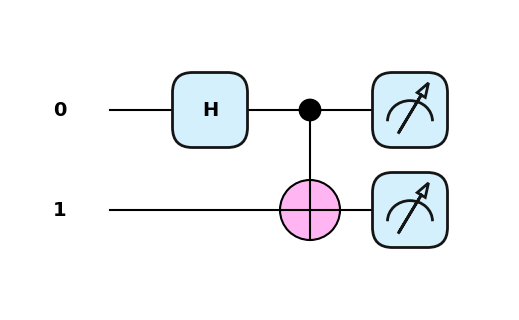

In [ ]:
fig, ax = qml.draw_mpl(bell_state_circuit_probs, decimals=2, style='pennylane')()
plt.show()

# Task 2: Build a GHZ State for 3 Qubits
Construct a circuit that prepares a 3-qubit GHZ state:

Use Hadamard and CNOT gates

Measure using qml.probs(wires=[0, 1, 2])

Optional: extend to 4 qubits

In [5]:
dev_3_qubits = qml.device("default.qubit", wires=3)

In [6]:
print("--- 3-Qubit GHZ State ---")
@qml.qnode(dev_3_qubits)
def ghz_3_qubits_circuit():
    """
    Prepares a 3-qubit GHZ state using Hadamard and CNOT gates.
    The GHZ state is (1/sqrt(2)) * (|000> + |111>).
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])

    return qml.probs(wires=[0, 1, 2])

probabilities_3_qubits = ghz_3_qubits_circuit()

print("\nProbabilities for 3-qubit GHZ state:")
for i, prob in enumerate(probabilities_3_qubits):
    binary_state = format(i, '03b')
    print(f"  State |{binary_state}>: {prob:.4f}")


--- 3-Qubit GHZ State ---

Probabilities for 3-qubit GHZ state:
  State |000>: 0.5000
  State |001>: 0.0000
  State |010>: 0.0000
  State |011>: 0.0000
  State |100>: 0.0000
  State |101>: 0.0000
  State |110>: 0.0000
  State |111>: 0.5000


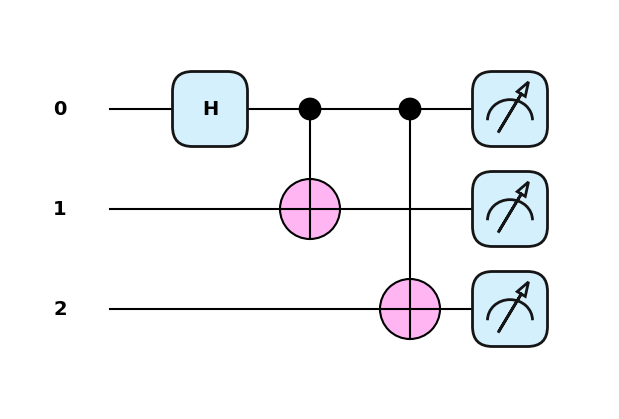

In [14]:
fig_3, ax_3 = qml.draw_mpl(ghz_3_qubits_circuit, decimals=2, style='pennylane')()
plt.show()

In [15]:
dev_4_qubits = qml.device("default.qubit", wires=4)

In [16]:
print("\n--- 4-Qubit GHZ State ---")
@qml.qnode(dev_4_qubits)
def ghz_4_qubits_circuit():
    """
    Prepares a 4-qubit GHZ state using Hadamard and CNOT gates.
    The GHZ state is (1/sqrt(2)) * (|0000> + |1111>).
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[0, 3])
    return qml.probs(wires=[0, 1, 2, 3])

probabilities_4_qubits = ghz_4_qubits_circuit()

print("\nProbabilities for 4-qubit GHZ state:")
for i, prob in enumerate(probabilities_4_qubits):
    binary_state = format(i, '04b')
    print(f"  State |{binary_state}>: {prob:.4f}")



--- 4-Qubit GHZ State ---

Probabilities for 4-qubit GHZ state:
  State |0000>: 0.5000
  State |0001>: 0.0000
  State |0010>: 0.0000
  State |0011>: 0.0000
  State |0100>: 0.0000
  State |0101>: 0.0000
  State |0110>: 0.0000
  State |0111>: 0.0000
  State |1000>: 0.0000
  State |1001>: 0.0000
  State |1010>: 0.0000
  State |1011>: 0.0000
  State |1100>: 0.0000
  State |1101>: 0.0000
  State |1110>: 0.0000
  State |1111>: 0.5000


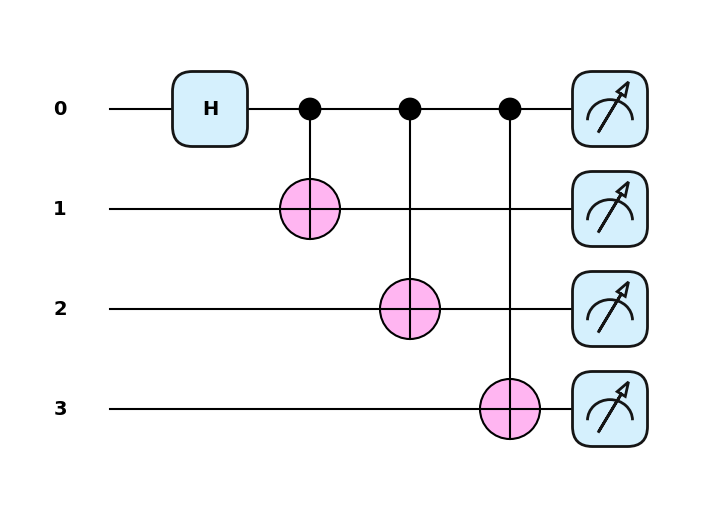

In [18]:
fig_4, ax_4 = qml.draw_mpl(ghz_4_qubits_circuit, decimals=2, style='pennylane')()
plt.show()

# Task 3: Rotation + Measurement Circuit
Design a single-qubit rotation circuit using RX, RY, or RZ gates.

Make the rotation angle a variable input

Return the expectation value of PauliZ

Plot how the output changes as you vary the input angle



## Task 4: Simple Variational Optimization
Create a cost function that depends on a gate parameter, and optimize it using PennyLane’s gradient descent optimizer.

Use a rotation gate like RX, and minimize expval(PauliZ)

Log or print cost at each step

Output the optimal parameter found

plot the cost function curve

# Task 5: Measurement Comparison
Build a 1- or 2-qubit circuit and compare results from:

qml.probs()

qml.sample()

qml.expval()

Explain how they differ in output and when you'd use each.

Discuss why probs() is deterministic but sample() is random.